<a href="https://colab.research.google.com/github/StanleyLiangYork/Covid_19/blob/master/CT_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install the package for CT / MRI image processing

In [1]:
!pip install itk
!pip install itkwidgets
!pip install ipywidgets

     |████████████████████████████████| 14.0MB 304kB/s 
     |████████████████████████████████| 10.3MB 25.7MB/s 
     |████████████████████████████████| 50.1MB 81kB/s 
     |████████████████████████████████| 36.3MB 121kB/s 
     |████████████████████████████████| 14.4MB 151kB/s 
     |████████████████████████████████| 68.0MB 56kB/s 
     |████████████████████████████████| 3.4MB 3.0MB/s 
     |████████████████████████████████| 1.6MB 32.4MB/s 
     |████████████████████████████████| 593kB 29.4MB/s 
     |████████████████████████████████| 2.0MB 35.5MB/s 
     |████████████████████████████████| 256kB 28.6MB/s 
     |████████████████████████████████| 2.4MB 43.3MB/s 


In [4]:
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import os

## 2. Load the CT images from GCP storage

In [5]:
if not os.path.exists('validation.zip'):
   !gsutil cp gs://pet-detect-239118/CT_Images_COVID-19.zip ./CT_Images_COVID-19.zip

Copying gs://pet-detect-239118/CT_Images_COVID-19.zip...
\ [1 files][ 11.8 GiB/ 11.8 GiB]   57.7 MiB/s                                   
Operation completed over 1 objects/11.8 GiB.                                     


In [6]:
import zipfile

with zipfile.ZipFile('/content/CT_Images_COVID-19.zip') as zobj:
  zobj.extractall('/content/')

In [11]:
path = '/content/CT_Images_COVID-19/'

files = os.listdir(path)

In [12]:
files[1]

'volume-covid19-A-0553.nii.gz'

In [14]:
# Define the image path and load the data
image_path = path+files[0]
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


In [15]:
# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [16]:
image_data.shape

(512, 512, 63)

In [17]:
# Get the image shape and print it out
height, width, depth = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}")

The image object has the following dimensions: height: 512, width:512, depth:63


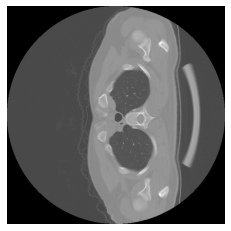

In [18]:
plt.imshow(image_data[:, :, 50], cmap='gray')
plt.axis('off');

In [19]:
# A function to interactively visualize various layers
def explore_CT_image(layer):
    plt.figure(figsize=(10, 5))
    plt.imshow(image_data[:, :, layer], cmap='gray');
    plt.title('Explore Layers of Chest CT', fontsize=20)
    plt.axis('off')
    return layer

In [20]:
image_data.shape

(512, 512, 63)

In [21]:
# Run the ipywidgets interact() function to explore the data
interact(explore_CT_image, layer=(0, image_data.shape[2]-1)); # 0-69, -1 to prevent from runtime error

interactive(children=(IntSlider(value=31, description='layer', max=62), Output()), _dom_classes=('widget-inter…